Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel $\rightarrow$ Restart) and then run all cells (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says YOUR CODE HERE or "YOUR ANSWER HERE", as well as your name and collaborators below:

### Name: Ciro Salcedo
### Collaborators: Yelissa Lopez, Leon Lui, Victor Zhou

In [82]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt
import scipy.special

# HW 3:  Root Finding and Optimization

## Question 1 - Finding the Root

Let's say that we wanted to calculate $\sqrt{M}$ given that $M \in \mathbb{R}$ and $M > 0$ and that we did not want to use the function `sqrt` directly.  One way to do this is to solve for the zeros of the function $f(x) = x^2 - M$.

 - Note that not all the methods will work!
 - Make sure to handle the case where $M_0 = \sqrt{M}$.
 - We are only looking for the positive root of $f(x)$.

**(a)** [5] Write a function that uses fixed-point iteration to solve for the zeros of $f(x)$.  

Note: There are multiple ways to write the iteration function $g(x)$, some work better than others.  Make sure to use the input function $f(x)$ to formulate this.

In [83]:
def fixed_point(x_0, f, tolerance):
    """Find the zeros of the given function f using fixed-point iteration
    
    :Input:
     - *x_0* (float) - Initial iterate
     - *f* (function) - The function that will be analyzed
     - *tolerance* (float) - Stopping tolerance for iteration
     
    :Output:
    If the iteration was successful the return values are:
     - *M* (float) - Zero found via the given intial iterate.
     - *n* (int) - Number of iterations it took to achieve the specified
       tolerance.
    otherwise
     - *x* (float) - Last iterate found
     - *n* (int) - *n = -1*
    """
    # Parameters
    MAX_STEPS = 1000
    x = x_0
    n = 0
    r = abs(f(x_0))
    #YOUR CODE HERE
    for i in range(1, MAX_STEPS+1):
        x = f(x) + x
        r = abs(f(x))
        if(r <= tolerance):
            return x, n
        n += 1

    return x, -1

In [84]:
M = 1.8
TOLERANCE = 1e-10
f = lambda x: x**2 - M

# Note that this test probably will fail
try:
    M_f, n = fixed_point(2.0, f, TOLERANCE)
except OverflowError:
    print("Fixed-point test failed!")
    print("Success!")
else:
    if n == -1:
        print("Fixed-point test failed!")
        print("Success!")
    else:
        print(M_f, n)
        raise ValueError("Test should have failed!")

Fixed-point test failed!
Success!


**(b)** [5] Write a function that uses Newton's method to find the roots of $f(x)$. The analytical derivative of $f'(x)$ is provided.

In [85]:
def newton(x_0, f, f_prime, tolerance):
    """Find the zeros of the given function f using Newton's method
    
    :Input:
     - *M_0* (float) - Initial iterate
     - *f* (function) - The function that will be analyzed
     - *f_prime* (function) - The derivative of *f*
     - *tolerance* (float) - Stopping tolerance for iteration
     
    :Output:
    If the iteration was successful the return values are:
     - *M* (float) - Zero found via the given intial iterate.
     - *n* (int) - Number of iterations it took to achieve the specified
       tolerance.
    otherwise
     - *M* (float) - Last iterate found
     - *n* (int) - *n = -1*
    """
    
    # Parameters
    MAX_STEPS = 1000
    x = x_0
    n = 0
    r = abs(f(x_0))
    #YOUR CODE HERE
    for i in range(1, MAX_STEPS+1):
        x = x - (f(x)/f_prime(x))
        r = abs(f(x))
        if(r <= tolerance):
            return x, n
        n += 1
        
    return x, -1

In [86]:
M = 3.0
TOLERANCE = 1e-10
f = lambda x: x**2 - M
f_prime = lambda x: 2.0 * x

M_f, n = newton(2.0, f, f_prime, TOLERANCE)
numpy.testing.assert_almost_equal(M_f, numpy.sqrt(M))
print(M_f, n)

M_f, n = newton(numpy.sqrt(M), f, f_prime, TOLERANCE)
print(M_f, n)
assert(n == 0)

print("Success!")

1.7320508075688772 3
1.7320508075688774 0
Success!


**(c)** [5] Write a function to find the zeros of $f(x)$ using the secant method.

In [87]:
def secant(x_0, f, tolerance):
    """Find the zeros of the given function f using the secant method
    
    :Input:
     - *M_0* (float) - Initial bracket
     - *f* (function) - The function that will be analyzed
     - *tolerance* (float) - Stopping tolerance for iteration
     
    :Output:
    If the iteration was successful the return values are:
     - *M* (float) - Zero found via the given intial iterate.
     - *n* (int) - Number of iterations it took to achieve the specified
       tolerance.
    otherwise
     - *M* (float) - Last iterate found
     - *n* (int) - *n = -1*
    """
    
    # Parameters
    MAX_STEPS = 1000
    
    x0 = x_0[0]
    x1 = x_0[1]
    n = 0
    r = abs(f(x1))
    #YOUR CODE HERE
    for i in range(1, MAX_STEPS+1):
        x = x1 - ((f(x1) * (x1 - x0) / (f(x1) - f(x0))))
        x0 = x1
        x1 = x
        r = abs(f(x1))
        if(r <= tolerance):
            return x, n
        n += 1
        
    return x, -1

In [88]:
M = 3.0
TOLERANCE = 1e-10
f = lambda x: x**2 - M

M_f, n = secant([0.0, 3.0], f, TOLERANCE)
numpy.testing.assert_almost_equal(M_f, numpy.sqrt(M))
print(M_f, n)

M_f, n = secant([1.0, numpy.sqrt(M)], f, TOLERANCE)
assert(n == 0)

print("Success!")

1.732050807565499 6
Success!


**(d)** [5] Using the theory and illustrative plots why the fixed-point method did not work (pick a bracket that demonstrates the problem well).  

The derivative of f(x) is less than 1 between -.5 and .5 it will only converge inside that bracket

If
$$
    |f'(x)| < 1 \quad \forall \quad x \in (a,b)
$$

then $f$ has a unique fixed point $P \in [a,b]$

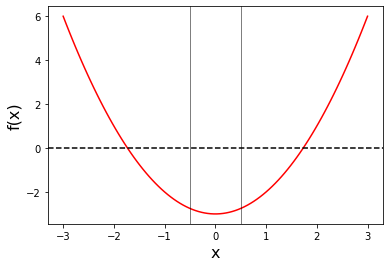

In [89]:
# Place plotting code here if needed

# YOUR CODE HERE
x = numpy.linspace(-3, 3, 100)
plt.plot(x, f(x), 'r', label='f(x)')
plt.xlabel("x",fontsize=16)
plt.ylabel("f(x)",fontsize=16)

plt.axvline(.5,color = "black",lw=.5)
plt.axvline(-.5, color = "black", lw=.5)
plt.axhline(0,linestyle="--",color = "black")

## Question 2 - Bessel Function Zeros

The zeros of the Bessel functions $J_0(x)$ can be important for a number of applications.  Considering only $x \geq 0$ 
we are going to find the first ten zeros of $J_0(x)$ by using a hybrid approach.

**(a)** [5] Plot the Bessel function $J_0(x)$ and its zeros on the same plot.  Note that the module `scipy.special` contains functions dealing with the Bessel functions (`jn`).

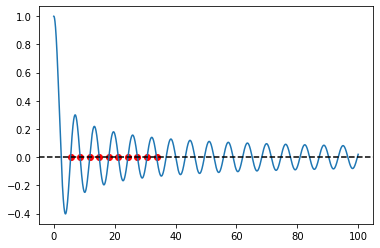

In [90]:
# YOUR CODE HERE
import scipy.special as spec
x=numpy.linspace(0,100,10000)
plt.plot(x, spec.jv(0,x))
x_0 = [i for i in x if abs(spec.jv(0,i)) <= .001]
plt.scatter(x_0[:10], spec.jv(0,x_0[:10]), color="red")
plt.axhline(0,color="black", linestyle="--")

**(b)** [15] Now write a function `j0_zeros` that takes two tolerances, a bracket size tolerance `bracket_tolerance` and `tolerance` for the final convergence tolerance.  Given an initial bracket, the function should perform secant iterations until the bracket size is less than `bracket_tolerance`.  If this is successful then proceed with Newton's method using the newest value of the bracket until `tolerance` is reached.  Return both the zero found and the number of steps needed in each iteration.  Also write a `doc-string` for the function.

Notes:
 - Newton's method by itself does not work here given the initial brackets provided.
 - The secant method does work however it is slower than the approach outlined.
 - Try playing a bit yourself with the tolerances used.

In [91]:
import scipy.special as sp

# Note that the num_steps being returned should be a list 
# of the number of steps being used in each method
def j0_zeros(x0, bracket_tolerance, tolerance):
    '''Takes a bracket x0 and performs the secant method on the zeroth order Bessel
    function until bracket tolerance is reached, at which point Newton's Method is employed
    using the upper bound of the bracket as an initial guess to find a zero within tolerance. 
    The root is returned as well as the number of steps needed for each method'''
    # YOUR CODE HERE
    #x0 is the bracket that contains x_0 and x_1
    num_steps = [0,0]
    #secant part
    #intialize
    x_0 = x0[0]
    x_1 = x0[1]
    
    #borrowing this from class
    if numpy.isclose(x_0,x_1):
        raise ValueError('Initial points are too close (preferably should be a bracket)')
    
    f = lambda x : sp.jv(0,x)
    f_prime = lambda x : sp.jvp(0,x,n=1)
    if(numpy.sign(f(x_0)) == numpy.sign(f(x_1))):
        raise ValueError('Invalid Starting Bracket')

    while(numpy.abs(x_0 - x_1) > bracket_tolerance):
        x_2 = x_1- f(x_1) * (x_1 - x_0) / (f(x_1) - f(x_0))
        x_0 = x_1
        x_1 = x_2
        num_steps[0] += 1
    #use Newton
    
    #x, num_steps[1] = Newton(x_0,x_1, tolerance)
    x = x_0
    while (abs(f(x)) > tolerance):
        x = x - f(x)/f_prime(x)
        num_steps[1] += 1
    return x, num_steps
    

In [92]:
brackets = [[ 2.0,  3.0], [ 4.0,  7.0], [ 7.0, 10.0], [10.0, 12.0], 
            [13.0, 15.0], [17.0, 19.0], [19.0, 22.0], 
            [22.0, 26.0], [26.0, 29.0], [29.0, 32.0]]

zero = []
for bracket in brackets:
    x, num_steps = j0_zeros(bracket, 1e-1, 1e-15)
    print(x, num_steps)
    zero.append(x)
numpy.testing.assert_allclose(zero, scipy.special.jn_zeros(0, 10), atol=0.0, rtol=1e-14)
print("Success!")

2.404825557695773 [2, 4]
5.520078110286311 [4, 3]
8.653727912911013 [2, 3]
11.79153443901428 [3, 2]
14.930917708487781 [2, 3]
18.071063967910924 [2, 2]
21.21163662987926 [3, 3]
24.352471530749302 [4, 3]
27.493479132040253 [2, 3]
30.634606468431976 [3, 3]
Success!


## Question 3 - Newton's Method Convergence

Recall that Newton's method converges as

$$|\epsilon_{n+1}| = \frac{|f''(c)|}{2 |f'(x_n)|} |\epsilon_n|^2$$

with $\epsilon_n = x_n - x^*$ where $x^*$ is the true solution and $c$ is between $x_n$ and $x^*$.

**(a)** [5] Show that the Newton iteration when $f(x) = x^2 - M$ with $M > 0$ is

$$x_{n+1} = \frac{1}{2} \left (x_n + \frac{M}{x_n} \right )$$

Newton's Method is defined as:
$$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$$

So:
$$x_{n+1} = x_n - \frac{x_n^2 - M}{2x_n}$$

$$x_{n+1} = x_n - \frac{x_n}{2} + \frac{M}{2x_n}$$

$$x_{n+1} = \frac{1}{2} (x_n + \frac{M}{x_n} )$$



**(b)** [5] From this update scheme show that 

$$\frac{x_{n+1} - \sqrt{M}}{(x_n - \sqrt{M})^2} = \frac{1}{2 x_n}$$

$$x_{n+1} = \frac{1}{2} (x_n + \frac{M}{x_n} )$$


$$\frac{\frac{1}{2} (x_n + \frac{M}{x_n} ) - \sqrt{M}}{(x_n - \sqrt{M})^2} = \frac{1}{2 x_n}$$

$$\frac{\frac{1}{2} (x_n + \frac{M}{x_n} ) - \sqrt{M}}{x_n^2 - 2x_n\sqrt{M} + M}$$

$$\frac{\frac{1}{2} (x_n + \frac{M}{x_n}  - 2\sqrt{M})}{x_n^2 - 2x_n\sqrt{M} + M}$$


$$\frac{\frac{1}{2x_n} (x_n^2 - 2\sqrt{M}x_n + M)}{x_n^2 - 2x_n\sqrt{M} + M}$$

$$\frac{1}{2x_n}$$

**(c)** [5] Confirm that the asymptotic error convergence matches the general convergence for Newton's method.

$$\frac{|\epsilon_{n+1}|}{|\epsilon_n|^2} = \frac{x_{n+1} - \sqrt{M}}{(x_n - \sqrt{M})^2}$$

$$\frac{|\epsilon_{n+1}|}{|\epsilon_n|^2} = \frac{2}{2  |2x_n|} = \frac{|f''(c)|}{2 |f'(x_n)|}$$

## Question 4 - Optimization of a Data Series

For the following questions we are given a set of data $(t_0, y_0), (t_1, y_1), \ldots, (t_N, y_N)$.

**(a)** [10] Write a function that takes in the data series $(t_i, y_i)$ and finds the value at a point $t_\ast$ by constructing the equation of the line between the two data points that bound $t_\ast$ and evaluating the resulting function at $t_\ast$.

Hints:
 - Make sure to handle the case that $t_\ast = t_i$.
 - If $t_\ast < t_0$ or $t_\ast > t_N$ then return the corresponding value $y_0$ or $y_N$.
 - If you write your function so that $t_\ast$ can be an array you can use the plotting code in the cell.  Otherwise just delete it.

In [103]:
def linear_eval(t, y, t_star):
    t_start, t_end = t[0], t[len(t)-1]
    y_star = float('inf')
    if t_star < t_start:
        y_star = y[0]
    elif t_star > t_end:
        y_star = y[len(y)-1]
    else:
        for i in range(len(t)-1):
            if t_star >= t[i] and t_star < t[i+1]:
                t_start = t[i]
                t_end = t[i+1]
                y_start = y[i]
                y_end = y[i+1]
                break
        slope = (y_end-y_start)/(t_end-t_start)
        y_star = y_start + slope * (t_star - t_start)
    return y_star

In [104]:
# Note that these tests can fail sometimes as it is dependent on random data.
N = 100
f = lambda x: numpy.sin(x) * numpy.cos(x)
t = numpy.linspace(-1, 1, N + 1)
t_star = 0.5
answer = linear_eval(t, f(t), t_star)
if isinstance(answer, list):
    answer = answer[0]
print("Computed solution: %s" % answer)
print("True solution: %s" % f(t_star))
numpy.testing.assert_almost_equal(answer, f(t_star), verbose=True, decimal=7)
print("Success!")

Computed solution: 0.42073549240394825
True solution: 0.42073549240394825
Success!


**(b)** [10] Using the function you wrote in part (a) write a function that uses Golden search to find the maximum of a series of data.  Again you can use the plotting code available if your `linear_eval` function from part (a) handles arrays.  Note that the initial bracket you are given will determine what maximum you will find.

In [130]:
def golden_search(bracket, t, y, max_steps=100, tolerance=1e-4):

    phi = (numpy.sqrt(5.0) - 1.0) / 2.0
    
    x_0 = bracket[0]
    x_3 = bracket[1]
    r = abs(linear_eval(t,y,x_3)-linear_eval(t,y,x_0))
    
    for n in range (1, max_steps+1):
        x_1 = x_3 - phi * (x_3-x_0)
        x_2 = x_0 + phi * (x_3-x_0)
        f_1 = linear_eval(t, y, x_1)
        f_2 = linear_eval(t, y, x_2)
        if f_1 > f_2:
            x_3 = x_2
        else:
            x_0 = x_1
        r = abs(linear_eval(t,y,x_3)-linear_eval(t,y,x_0))
        if(r<=tolerance):
            t_star = (x_0 + x_3)/2
            return t_star
        n+=1
    t_star = (x_0 + x_3)/2
    return t_star

In [131]:
N = 100
t = numpy.random.rand(N + 1) * (2.0 * numpy.pi)
t.sort()
y = numpy.sin(t) * numpy.cos(2.0 * t)
t_star = golden_search([2.0, 3.0], t, y)
t_true = 7.0 * numpy.pi / 8.0
abs_error = numpy.abs(t_star - t_true)
rel_error = numpy.abs(t_star - t_true) / numpy.abs(t_true)
print("Error: %s, %s" % (abs_error, rel_error))
numpy.testing.assert_allclose(abs_error, 0.0, rtol=1e-1, atol=1e-1)
print("Success!")

Error: 0.04038999623924111, 0.014693182978144653
Success!


**(c)** [5] Below is sample code that plots the number of sample points $N$ vs. the relative error.  Note because we are sampling at random points that we do each $N$ 6 times and average the relative error to reduce noise.  Additionally a line is drawn representing what would be linear (1st order) convergence.

Modify this code and try it out on other problems.  Do you continue to see linear convergence?  What about if you change how we sample points?  Make sure that you change your initial interval and range of values of $t$ inside the loop.

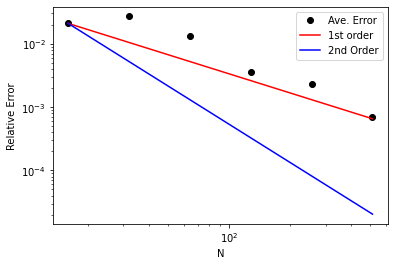

In [147]:
# YOUR CODE HERE
#raise NotImplementedError()
f = [lambda t: numpy.sin(t) * numpy.cos(2.0 * t), lambda t:numpy.sin(2*t)* numpy.cos(2.0 * t), lambda t: numpy.tan(.5*t)]
N_range = numpy.array([2**n for n in range(4, 10)], dtype=int)
rel_error = numpy.zeros(len(N_range))
t_true = 3.0 * numpy.pi / 2.0

for (i, N) in enumerate(N_range):
    shots = 6 #replacing the number of attempts
    for j in range(shots):
        t = numpy.random.rand(N + 1) * (2.0 * numpy.pi)
        t.sort()
        y = f[0](t)
        t_star = golden_search([4.0, 5.0], t, y)
        rel_error[i] += numpy.abs(t_star - t_true) / numpy.abs(t_true)
    rel_error[i] /= shots

order_C = lambda N, error, order: numpy.exp(numpy.log(error) - order * numpy.log(N))
    
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.loglog(N_range, rel_error, 'ko', label="Ave. Error")
axes.loglog(N_range, order_C(N_range[0], rel_error[0], -1.0) * N_range**(-1.0), 'r', label="1st order")
axes.loglog(N_range, order_C(N_range[0], rel_error[0], -2.0) * N_range**(-2.0), 'b', label="2nd Order")
axes.set_xlabel("N")
axes.set_ylabel("Relative Error")
axes.legend()
plt.show()


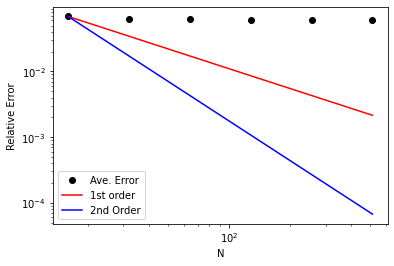

In [148]:
for (i, N) in enumerate(N_range):
    shots = 6 #replacing the number of attempts
    for j in range(shots):
        t = numpy.random.rand(N + 1) * (2.0 * numpy.pi)
        t.sort()
        y = f[1](t)
        t_star = golden_search([4.0, 5.0], t, y)
        rel_error[i] += numpy.abs(t_star - t_true) / numpy.abs(t_true)
    rel_error[i] /= shots

order_C = lambda N, error, order: numpy.exp(numpy.log(error) - order * numpy.log(N))
    
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.loglog(N_range, rel_error, 'ko', label="Ave. Error")
axes.loglog(N_range, order_C(N_range[0], rel_error[0], -1.0) * N_range**(-1.0), 'r', label="1st order")
axes.loglog(N_range, order_C(N_range[0], rel_error[0], -2.0) * N_range**(-2.0), 'b', label="2nd Order")
axes.set_xlabel("N")
axes.set_ylabel("Relative Error")
axes.legend()
plt.show()

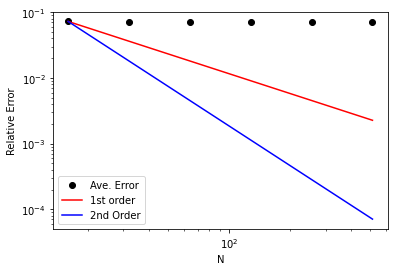

In [149]:
for (i, N) in enumerate(N_range):
    shots = 6 #replacing the number of attempts
    for j in range(shots):
        t = numpy.random.rand(N + 1) * (2.0 * numpy.pi)
        t.sort()
        y = f[2](t)
        t_star = golden_search([4.0, 5.0], t, y)
        rel_error[i] += numpy.abs(t_star - t_true) / numpy.abs(t_true)
    rel_error[i] /= shots

order_C = lambda N, error, order: numpy.exp(numpy.log(error) - order * numpy.log(N))
    
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.loglog(N_range, rel_error, 'ko', label="Ave. Error")
axes.loglog(N_range, order_C(N_range[0], rel_error[0], -1.0) * N_range**(-1.0), 'r', label="1st order")
axes.loglog(N_range, order_C(N_range[0], rel_error[0], -2.0) * N_range**(-2.0), 'b', label="2nd Order")
axes.set_xlabel("N")
axes.set_ylabel("Relative Error")
axes.legend()
plt.show()

Increasing the amount "shots" will decrease average error for a convergent solution, but not all of these functions have a convergent solution. That is clearly seen in the error of the second and third plot.

## Question 9 - Inverse Quadratic Interpolation

Let us see if we can extend the idea of the secant method to a higher order version.  The idea then is to take 3 values of the function such that $(x_0, f(x_0))$, $(x_1, f(x_1))$, and $(x_2, f(x_2))$ and fit an inverse quadratic function through these points (note that this requires that $f(x_i) \neq f(x_j) \forall i \neq j$).  The inverse function can be written as
$$
    g(y) = x_2 + \frac{(y - f(x_1)) (y - f(x_2))(x_0 - x_2)}{(f(x_0) - f(x_1))(f(x_0) - f(x_2))} + \frac{(y - f(x_0)) (y - f(x_2))(x_1 - x_2)}{(f(x_1) - f(x_0))(f(x_1) - f(x_2))}
$$
Inverse quadratic interpolation is one of the core components of many root solvers in libraries such as `numpy`.

Using this new function answer the following questions.

**(a)** [5] Find the x-intercept of the function $g(y)$.

$$
g(0) = x_2 + \frac{f(x_1)f(x_2)(x_0 - x_2)}{(f(x_0) - f(x_1))(f(x_0) - f(x_2))} + \frac{f(x_0)f(x_2)(x_1 - x_2)}{(f(x_1) - f(x_0))(f(x_1) - f(x_2))}
$$

**(b)** [5] Write down the resulting iteration so that it has the form
$$
    x_{n+1} = x_n + \phi(x_n, x_{n-1}, x_{n-2})
$$
where $\phi(x_n, x_{n-1}, x_{n-2})$ can also contain evaluations of the original function $f(x)$.

$$
x_{n+1} = x_n + \frac{f(x_{n-1})f(x_n)(x_{n-2} - x_n)}{(f(x_{n-2}) - f(x_{n-1}))(f(x_{n-2}) - f(x_n))} + \frac{f(x_{n-2})f(x_n)(x_{n-1} - x_n)}{(f(x_{n-1}) - f(x_{n-2}))(f(x_{n-1}) - f(x_n))}
$$

**(c)** [10] Write a function that implements the inverse quadratic interpolation root finding method which takes in a function $f$ and an initial triplet for an initial guess $(x_0, x_1, x_2)$.  Make sure that it handles the case when the maximum number of steps is taken.

In [41]:
def inv_quad_root(f, x, tolerance=1e-4, max_steps=100):
    """Find a root of f(x) using inverse quadratic interpolation
    
    :Input:
     - *f* (func) Function to find the root of.
     - *x* (list) A triplet of values to be used to start the method.  Note
       that the triplet starts with the x_0 value and ends with the x_2 value
       in terms of the iteration scheme.
     - *tolerance* (float) Tolerance used as a stopping criteria with 
       |f(x_n)| < tolerance.
     - *max_steps* (int) Maximum number of steps allowed.  Raise an exception
       if max_steps are reached.
    :Output:
     - (float) Converged root.
    """
    # YOUR CODE HERE
    n = 0 
    x3 = 0 
    r = abs(f(x[2]))
    
    for n in range(1,max_steps+1):
        x3 = x[2] + f(x[1]) * f(x[2]) * (x[0] - x[2]) / ((f(x[0]) - f(x[1])) * (f(x[0]) - f(x[2]))) + f(x[0]) * f(x[2]) * (x[1] - x[2]) / ((f(x[1]) - f(x[0])) * (f(x[1]) - f(x[2])))
        
        x[0] = x[1]
        x[1] = x[2]
        x[2] = x3
        
        r = abs(f(x[2]))
        if(r <= tolerance):
            return x[2]
        n += 1
            
    return x[2]

In [42]:
P = 1500.0
m = 12
n = 20.0
A = 1e6
f = lambda r, A=A, m=m, P=P, n=n: A - m * P / r * ((1.0 + r / m)**(m * n) - 1.0)
root = inv_quad_root(f, [0.06, 0.07, 0.08], tolerance=1e-6, max_steps=10)
print("Found root = %s" % root)
numpy.testing.assert_allclose(root, 0.08985602483470391, atol=1e-5)
print("Success!")

Found root = 0.08985602483470391
Success!
